# <center> DBSCAN Clustering

- DBSCAN stands for Density-Based Spatial Clustering of Applications with Noise. This technique is one of the most common clustering algorithms  which works based on density of object. i.e, if a particular point belongs to a cluster, it should be near to lots of other points in that cluster.

- It works based on two parameters: Epsilon and Minimum Samples.
- ***Epsilon*** determine a specified radius that if includes enough number of points within, we call it dense area.
- ***minimumSamples*** determine the minimum number of data points we want in a neighborhood to define a cluster.

- In this notebook, the main focus is comparing the performance of different clustering algorithms and manipulating the data and properties of DBSCAN while observing the resulting clustering.


In [9]:
import math
import numpy as np
import pandas as pd

import sklearn.utils
from sklearn import datasets
from sklearn.preprocessing import StandardScaler

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from pylab import rcParams

%matplotlib inline

<w>

# I- Generating Data
Circle within a circle with noise

In [10]:
x, y = datasets.make_circles(n_samples=2000, factor=0.50, noise=0.08, random_state=42)
r = np.random.RandomState(42)
noise = r.rand(500, 2)*2.5 - 1.25
data = np.concatenate((x, noise))


In [11]:
df = pd.DataFrame(data)
df[:3]

,0,1
0,0.215137,-0.292390
1,-0.640346,0.825515
2,-0.252846,0.471699


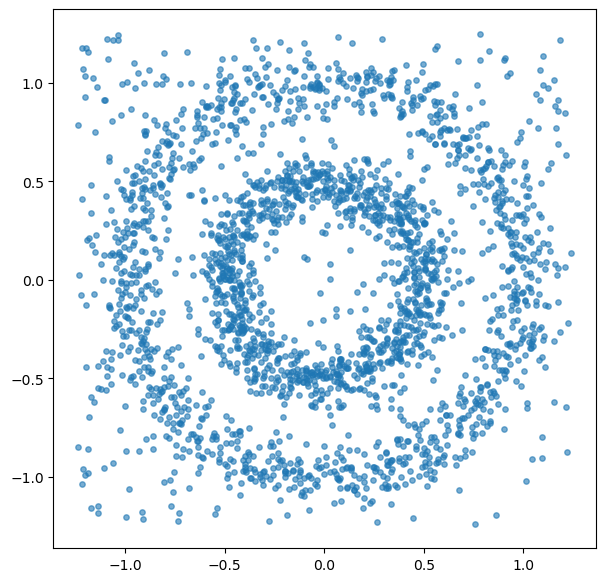

In [12]:
plt.figure(figsize=(7, 7))
plt.scatter(df[0], df[1], s=15, alpha=0.6)
plt.show()

<w>

# II- Comparing Performance of Different Clustering Algorithms

<w>

### 1) K-Means Clustering

In [13]:
from sklearn.cluster import KMeans

/Users/fathimab/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


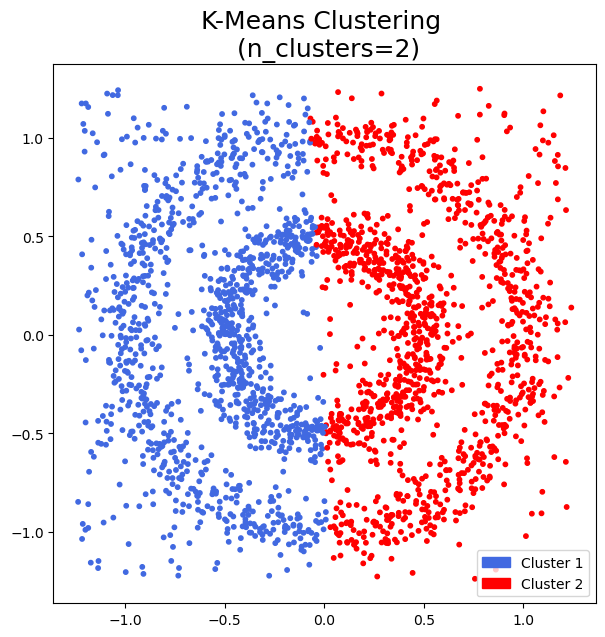

In [17]:
# Model
k_means=KMeans(n_clusters=2,random_state=42)
k_means.fit(df[[0,1]])
# Extracting labels
df['kmeans_labels'] = k_means.labels_

Cluster1_legend = mpatches.Patch(color=colors[0], label='Cluster 1')
Cluster2_legend = mpatches.Patch(color=colors[1], label='Cluster 2')

# Plotting
plt.figure(figsize=(7,7))
plt.scatter(df[0],df[1],c=df['kmeans_labels'],cmap=matplotlib.colors.ListedColormap(colors),s=10)
plt.title('K-Means Clustering \n (n_clusters=2)',fontsize=18)
plt.legend(handles=[Cluster1_legend, Cluster2_legend])
plt.show()

K-Means clustering algorithm also failed to cluster the data points properly

<w>

### 3) DBSCAN Clustering
Firstly, we need to find the value of epsilon and minPoints and then train our model. For epsilon, I am using the K-distance graph. For plotting a K-distance Graph, we need the distance between a point and its nearest data point for all data points in the dataset. We obtain this using NearestNeighbors from sklearn.neighbors.

In [18]:
from sklearn.neighbors import NearestNeighbors

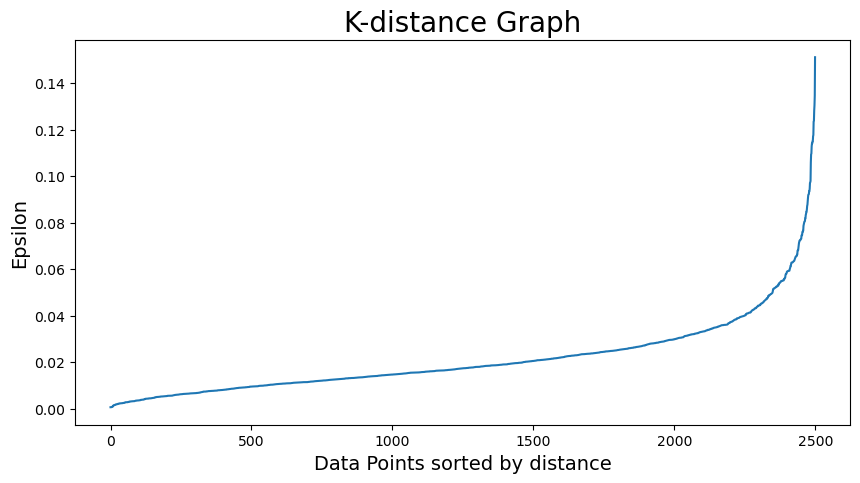

In [19]:
# Model of Nearest Neighbors
nn = NearestNeighbors(n_neighbors=2)
nbrs = nn.fit(df[[0,1]])
distances, indices = nbrs.kneighbors(df[[0,1]])

# Plotting K-distance Graph
distances = np.sort(distances, axis=0)
distances1 = distances[:,1]

plt.figure(figsize=(10,5))
plt.plot(distances1)
plt.title('K-distance Graph',fontsize=20)
plt.xlabel('Data Points sorted by distance',fontsize=14)
plt.ylabel('Epsilon',fontsize=14)
plt.show()

The optimum value of epsilon is at the point of maximum curvature in the K-Distance Graph, which is 0.08 in this case. Finding the value of minimumSamples depends on a combination of domain knowledge and trial & error process.

In [20]:
from sklearn.cluster import DBSCAN

In [21]:
# DBSCAN Model
dbscan=DBSCAN(eps=0.08, min_samples=11)
dbscan.fit(df[[0,1]])

# Extracting labels
df['dbscan_labels'] = dbscan.labels_
df['dbscan_labels'].value_counts()

 1    1106
 0    1083
-1     311
Name: dbscan_labels, dtype: int64

Unlike the afore-mentioned clustering algorithms, DBSCAN can separate noise from the dataset pretty well. Here, 0 & 1 are the two different clusters and -1 is the noise. 

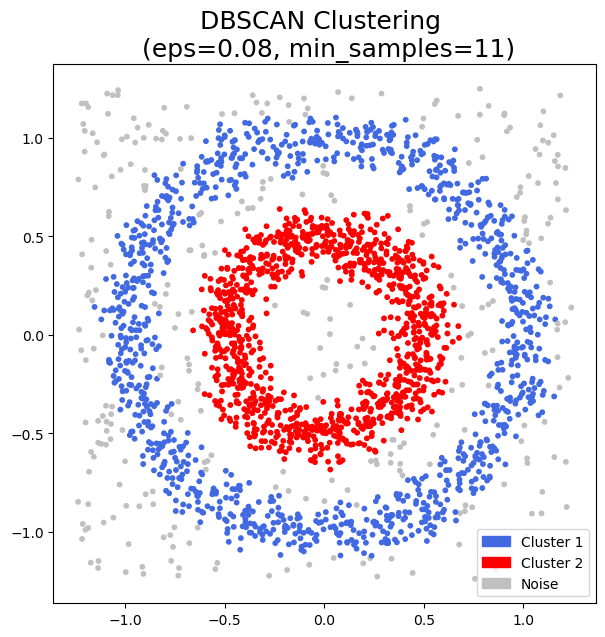

In [22]:
# Plotting results
dbscan_colors=['silver','red','royalblue']
noise_legend = mpatches.Patch(color=dbscan_colors[0], label='Noise')

plt.figure(figsize=(7,7))
plt.scatter(df[0],df[1],c=df['dbscan_labels'],cmap=matplotlib.colors.ListedColormap(dbscan_colors),s=10)
plt.title('DBSCAN Clustering \n (eps=0.08, min_samples=11)',fontsize=18)
plt.legend(handles=[Cluster1_legend, Cluster2_legend, noise_legend])
plt.show()

DBSCAN accurately clustered the data points into 2 clusters and detected the noise in the dataset (represented by the grey color)

### 4) Plotting All Resulting Clusters

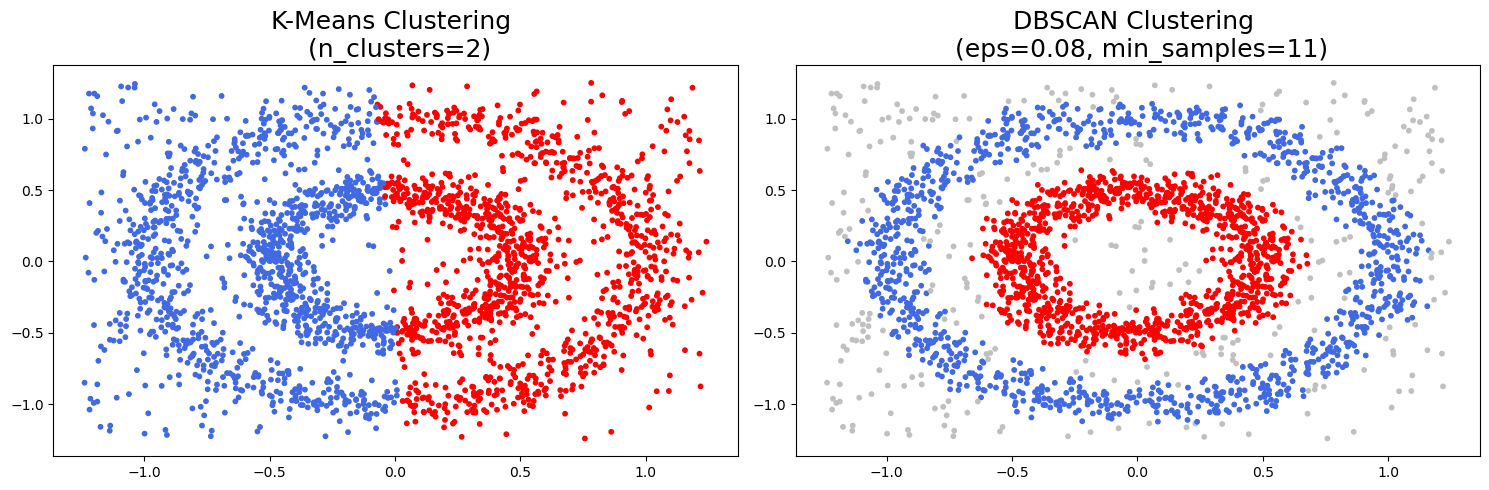

In [24]:
plt.rcParams["figure.figsize"] = (15,5)

plt.subplot(1, 2, 1)
plt.scatter(df[0],df[1],c=df['kmeans_labels'],cmap=matplotlib.colors.ListedColormap(colors),s=10)
plt.title('K-Means Clustering \n (n_clusters=2)', fontsize=18)

plt.subplot(1, 2, 2)
plt.scatter(df[0],df[1],c=df['dbscan_labels'],cmap=matplotlib.colors.ListedColormap(dbscan_colors),s=10)
plt.title('DBSCAN Clustering \n (eps=0.08, min_samples=11)', fontsize=18)

plt.tight_layout()
plt.show()

<w>